Plot comparison of $C_{gg}$ only analysis vs full 3 X 2 analysis

In [1]:
import numpy as np
import pickle

from corner import corner
import matplotlib.pyplot as plt
from getdist import plots, MCSamples

In [3]:
fdir = "/home/tkarim/SkyLens/scripts/tests/"
#cgg = pickle.load( open( fdir + "pcl_1_bl0_bth0_nw50_ns50_camb0_cgg_tst.pkl", "rb" ) )
cgg = pickle.load( open( fdir + "pcl_1_bl0_bth0_nw40_ns3000_camb0_cgg.pkl", "rb" ) )
#ckg = pickle.load( open( fdir + "pcl_1_bl0_bth0_nw50_ns50_camb0_ckg_tst.pkl", "rb" ) )
ckg = pickle.load( open( fdir + "pcl_1_bl0_bth0_nw30_ns2000_camb0_ckg.pkl", "rb" ) )

In [12]:
# Get the getdist MCSamples objects for the samples, specifying same parameter
# names and labels; if not specified weights are assumed to all be unity
labels = [r'b_{1,0}', 'A_s x 10^{9}', '\Omega_M', r'\Sigma m_{\nu}']
samples_cgg = MCSamples(samples=cgg['chain'],names = cgg['params_order'], labels = labels,
                       label = r'$C_{gg}$')
samples_ckg = MCSamples(samples=ckg['chain'].reshape(-1, ckg['chain'].shape[-1]),
                        names = cgg['params_order'], labels = labels, 
                        label= r'$3 x 2$')

Removed no burn in
Removed no burn in


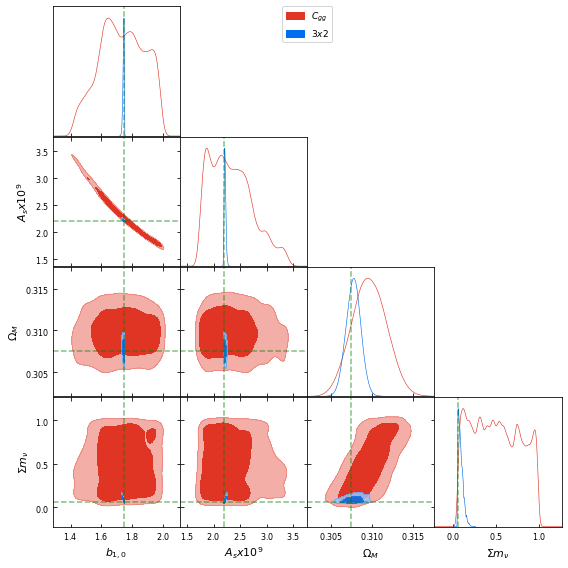

In [15]:
# Triangle plot
g = plots.get_subplot_plotter()
g.triangle_plot([samples_cgg, samples_ckg], filled=True, figsize = (10, 7))

for ax in g.subplots[:,0]:
    ax.axvline(1.75, color='green', ls='--', alpha = 0.5)
for ax in g.subplots[1:,1]:
    ax.axvline(2.2, color='green', ls='--', alpha = 0.5)
for ax in g.subplots[2:,2]:
    ax.axvline(.3075, color='green', ls='--', alpha = 0.5)
for ax in g.subplots[3:,3]:
    ax.axvline(.06, color='green', ls='--', alpha = 0.5)
    
for ax in g.subplots[1:,0]:
    ax.axhline(2.2, color='green', ls='--', alpha = 0.5)
for ax in g.subplots[2,:2]:
    ax.axhline(.3075, color='green', ls='--', alpha = 0.5)
for ax in g.subplots[3,:-1]:
    ax.axhline(0.06, color='green', ls='--', alpha = 0.5)

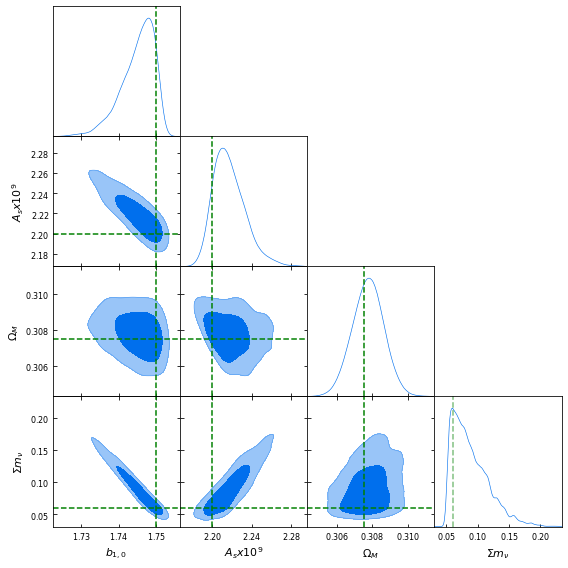

In [18]:
# Triangle plot
g = plots.get_subplot_plotter()
g.triangle_plot([samples_ckg], filled=True, figsize = (10, 7))

for ax in g.subplots[:,0]:
    ax.axvline(1.75, color='green', ls='--')
for ax in g.subplots[1:,1]:
    ax.axvline(2.2, color='green', ls='--')
for ax in g.subplots[2:,2]:
    ax.axvline(.3075, color='green', ls='--')
for ax in g.subplots[3:,3]:
    ax.axvline(.06, color='green', ls='--', alpha = 0.5)
    
for ax in g.subplots[1:,0]:
    ax.axhline(2.2, color='green', ls='--')
for ax in g.subplots[2,:2]:
    ax.axhline(.3075, color='green', ls='--')
for ax in g.subplots[3,:-1]:
    ax.axhline(0.06, color='green', ls='--')

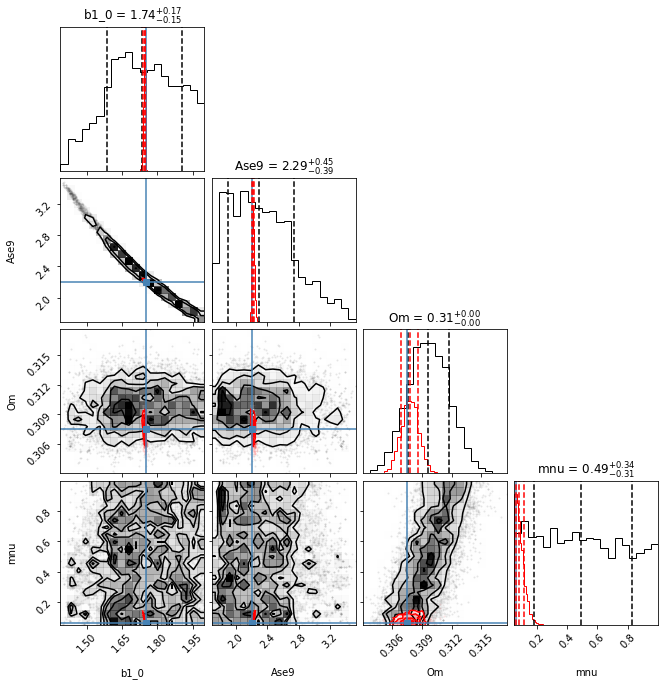

In [16]:
figure = corner(cgg['chain'],quantiles=[0.16, 0.5, 0.84],
                title_kwargs={"fontsize": 12}, show_titles=True,
                labels=cgg['params_order'],
                truths=[1.75, 2.2, .3075, 0.06])

corner(ckg['chain'].reshape(-1, ckg['chain'].shape[-1]), quantiles=[0.16, 0.5, 0.84],
       fig=figure, color='red')
plt.show()

[]

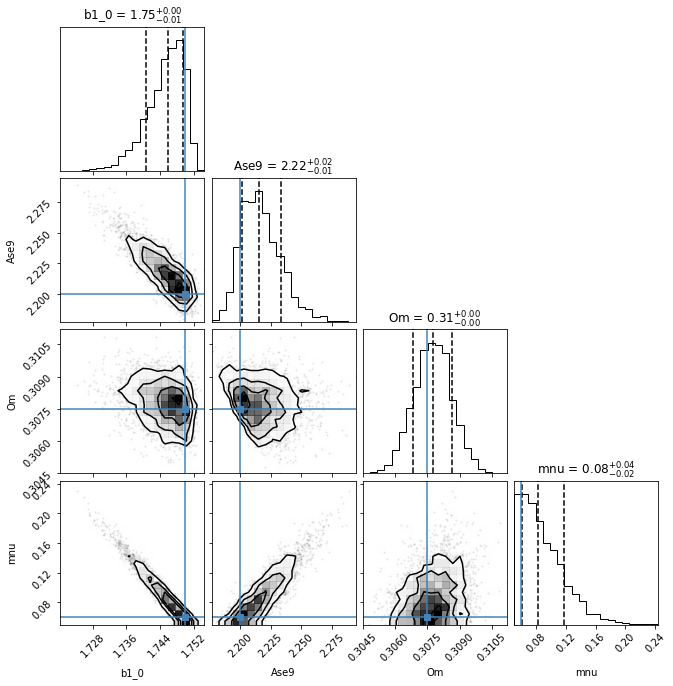

In [17]:
_ = corner(ckg['chain'].reshape(-1, ckg['chain'].shape[-1]),quantiles=[0.16, 0.5, 0.84],
                       title_kwargs={"fontsize": 12}, show_titles=True,
          labels=ckg['params_order'],
          truths=[1.75, 2.2, .3075, 0.06])
plt.plot()